In [4]:
import numpy as np

str = '1234_bla'
lis = [0,1,2,3,4]
arr = np.array([[1,2],[3,4]])

In [14]:
def funct(a,b,c):
    return a+b+c

vfunct = np.vectorize(funct)

In [24]:
a = np.array(['a1', 'a2'])
b = np.array(['b1', 'b2'])
c = np.array(['c1', 'c2'])

a,b,c = np.meshgrid(a,b,c)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

with open('test.npy', 'rb') as f:
    S0_values = np.load(f, allow_pickle=True)
    s_values = np.load(f, allow_pickle=True)
    s_values_notopo = np.load(f, allow_pickle=True)

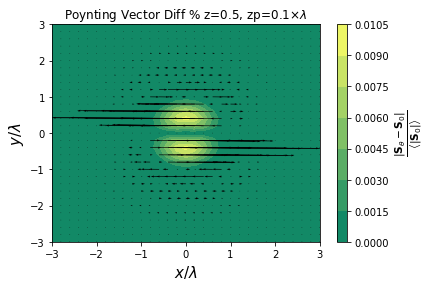

In [8]:
r = 3
p = 30
par = 2*r/p
zc = 0.5*(600*10**(-9))
zp = 0.1*(600*10**(-9))
xs = np.arange(-r, r+par, par)*(600*10**(-9))
ys = np.arange(-r, r+par, par)*(600*10**(-9))
x,y = np.meshgrid(xs,ys)

s0_norms = np.array([[np.linalg.norm([v[0],v[1]]) for v in row] for row in s_values_notopo])
mask = s0_norms>10**(70)
mask2 = s0_norms<10**(70)
masked_new_norms = np.ma.array(s0_norms, mask=mask)
normalization_factor = np.mean(masked_new_norms)


X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = (s_values - s_values_notopo)/normalization_factor#*SF
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = np.array([np.array([np.linalg.norm([v[0],v[1]]) for v in row]) for row in new_values])
mask = new_norms>10**(20)
mask2 = new_norms<10**(20)
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

masked_new_norms = np.ma.array(new_norms, mask=mask)

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, masked_new_norms, cmap='summer')
cb = fig.colorbar(ax2)
#ax2 = plt.quiver(X, Y, U, V)
ax2 = plt.quiver(X[mask2], Y[mask2], U[mask2], V[mask2])
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
ax.set_title(r'Poynting Vector Diff % z={}, zp={}$\times\lambda$ '.format(zc/(600*10**(-9)), zp/(600*10**(-9))))
cb.ax.set_ylabel(r'$\frac{|\mathbf{S}_\theta-\mathbf{S}_0|}{\left<|{\mathbf{S}_0}|\right>}$', size=15)
fig.savefig('Plots Scan/Poynt_diff_%_z={},zp={}.png'.format(zc/(600*10**(-9)), zp/(600*10**(-9))), bbox_inches='tight')